In [3]:
from __future__ import print_function
import psycopg2





conn = psycopg2.connect("dbname='cluster' user='guest' host='sissy-data-01.exp.helmholtz-berlin.de' port='5432' password='guest'")

#conn = psycopg2.connect(database="cluster", user="guest", password="guest", host="sissy-data-01.exp.helmholtz-berlin.de", port="5432")
cursor = conn.cursor()

cursor.execute("SELECT * FROM information_schema.tables")
records = cursor.fetchall()


#print(*records, sep='\n\n')

cursor.execute("SELECT * FROM _helper_carrier_sample_history")
records = cursor.fetchall()
#print(*records, sep='\n\n')

cursor.execute("SELECT * FROM actual_holders_in_chamber")
records = cursor.fetchall()
#print(*records, sep='\n\n')

# We care about this one: (32188, 9, 'ES', 'EndStation Chamber', 117, 'Holder49 (25x25)', 1, 'PTS 25x25', 'PTS 25x25.png', 1, 'Holder for samples 25x25x(0,7 v 1,1 v 3 v 3,3)\r\nP/N: 01-3031-0010-00054\r\nS/N: 10005', datetime.datetime(2021, 10, 1, 11, 34, 1, 948000), None, 1, None)

        
cursor.execute("SELECT * FROM sampletypes_tab")
records = cursor.fetchall()
#print(*records, sep='\n\n')

cursor.execute("SELECT * FROM samples_in_holder")
records = cursor.fetchall()

for record in records:
    if 'Holder10 (50x50)' in record:
        print(record)

#cursor.execute('SELECT COUNT(MemberID) as count FROM Members WHERE id = 1')
#print(*records, sep='\n\n')

conn.close()

#print(row)

(42, 'SnCl2', 'SnCl2 deposition', 11, 'Holder10 (50x50)', 'Holder for samples 50x50\r\nP/N: 01-3031-0010-00055\r\nS/N: 10002', datetime.datetime(2016, 2, 3, 12, 4, 48, 640000), datetime.datetime(2016, 5, 26, 17, 7, 13, 52000), 1, 0, False)
(11, 'glass for Mo and SnCl2', '50x50 glass\r\nfor Mo evap then SnCl2 evap', 11, 'Holder10 (50x50)', 'Holder for samples 50x50\r\nP/N: 01-3031-0010-00055\r\nS/N: 10002', datetime.datetime(2016, 7, 15, 16, 34, 38, 332000), datetime.datetime(2016, 7, 18, 12, 38, 35, 761000), 1, 0, False)
(11, 'glass for Mo and SnCl2', '50x50 glass\r\nfor Mo evap then SnCl2 evap', 11, 'Holder10 (50x50)', 'Holder for samples 50x50\r\nP/N: 01-3031-0010-00055\r\nS/N: 10002', datetime.datetime(2016, 7, 18, 17, 49, 6, 594000), datetime.datetime(2016, 7, 22, 15, 48, 19, 613000), 1, 0, False)
(900, 'CEJ_CuBi2O4library', 'sample prepared on 11.05.2021\r\nvacuum trnafered to ahof\r\nstored in GB for 5 days', 11, 'Holder10 (50x50)', 'Holder for samples 50x50\r\nP/N: 01-3031-0010-

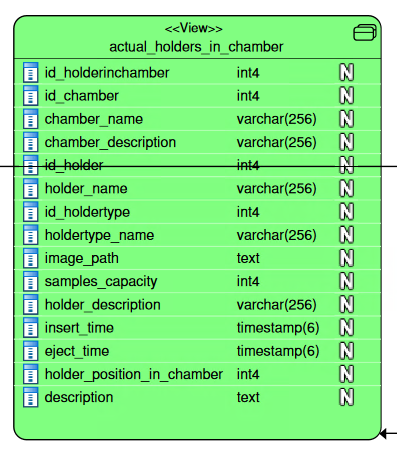

In [4]:
#Each chamber can have mutliple holders, each holder one sample. 

def getHoldersInChamber(chamber):
    

    conn = psycopg2.connect("dbname='cluster' user='guest' host='sissy-data-01.exp.helmholtz-berlin.de' port='5432' password='guest'")

    
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM actual_holders_in_chamber")
    records = cursor.fetchall()            
    conn.close()
    holders = []
    
    for record in records:
        if chamber in record:
          
            holders.append( {
                "id": record[0],
                "id_chamber": record[1],
                "chamber_name": record[2],
                "id_holder": record[4],
                "name": record[5],
                "type_id":record[6],
                "type":record[7],
                "insert_time": record[11],
                "eject_time": record[12],
                "description":record[14]

            })
    
            
    
    return(holders)
        
        
     
getHoldersInChamber('ST1')   

        

    

[{'id': 30164,
  'id_chamber': 15,
  'chamber_name': 'ST1',
  'id_holder': 7,
  'name': 'Holder6 (25x25) 800',
  'type_id': 16,
  'type': 'PTS 25x25 (800 RES)',
  'insert_time': datetime.datetime(2021, 6, 6, 18, 5, 33, 974000),
  'eject_time': None,
  'description': None},
 {'id': 30182,
  'id_chamber': 15,
  'chamber_name': 'ST1',
  'id_holder': 8,
  'name': 'Holder7 (25x25) 600',
  'type_id': 14,
  'type': 'PTS 25x25 (600 RES)',
  'insert_time': datetime.datetime(2021, 6, 7, 9, 51, 3, 604000),
  'eject_time': None,
  'description': None},
 {'id': 31309,
  'id_chamber': 15,
  'chamber_name': 'ST1',
  'id_holder': 135,
  'name': 'Holder52',
  'type_id': 31,
  'type': '2 inch round EB',
  'insert_time': datetime.datetime(2021, 8, 23, 17, 5, 25, 206000),
  'eject_time': None,
  'description': None},
 {'id': 31845,
  'id_chamber': 15,
  'chamber_name': 'ST1',
  'id_holder': 11,
  'name': 'Holder10 (50x50)',
  'type_id': 2,
  'type': 'PTS 50x50',
  'insert_time': datetime.datetime(2021, 9,

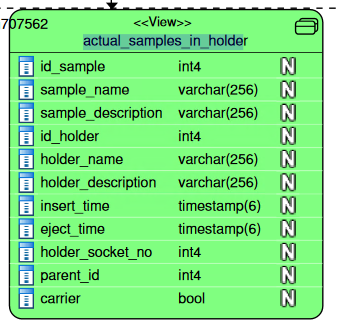

In [5]:
# Now get the samples in that holder


def getSamplesInHolder(holder):
    
    conn = psycopg2.connect("dbname='cluster' user='guest' host='sissy-data-01.exp.helmholtz-berlin.de' port='5432' password='guest'")
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM actual_samples_in_holder")
    records = cursor.fetchall()
    conn.close()

    samples=[]
    for record in records:
            if holder in record:

                samples.append({
                "id": record[0],
                "name": record[1],
                "description": record[2],
                "id_holder": record[3],
                "holder_name": record[4],
                "insert_time": record[6],
                "eject_time": record[7],
                "parent_id": record[8]

                })
                
                
            
    return samples
    
    
            
                
getSamplesInHolder('Holder10 (50x50)')



[]

In [6]:
def getSamplesInChamber(chamber):
    
    holders = getHoldersInChamber(chamber)
    samples = []
    for holder in holders:
        samples.append(getSamplesInHolder(holder['name']))
    
    return samples

getSamplesInChamber('ES')
    

[[{'id': 553,
   'name': 'fluorescent screen',
   'description': '',
   'id_holder': 117,
   'holder_name': 'Holder49 (25x25)',
   'insert_time': datetime.datetime(2019, 5, 21, 11, 5, 44, 817000),
   'eject_time': None,
   'parent_id': 1}]]

Regan:

I would define a sample holder (for the SISSY system) as anything that has the “ears” that are grabbed by the automatic transfer system. Each of these bases has a unique serial number. A carrier is a separate, removable chunk of metal that can be attached to a sample holder to accommodate (generally) multiple samples. Each sample location on a physical holder has a visible number etched into it. I also created a class of “dummy” holders which have no physical reality – if someone mounts multiple samples onto a sample holder, they can add a dummy carrier with individual “locations” for samples. This is just a workaround – I think that in principle we could adjust the parameters of the holders to allow for multiple samples, but I didn’t want to mess around with the existing system too much.

Right now there is a good example of a sample holder with a dummy carrier in the system – ST1 chamber has a holder with 4 samples with names like JF_glas or something. Holder ID is 11. I don’t see any physical carriers in the system right now.
